# A. Nonlinear Transformation

In [1]:
%pip install feature_engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from feature_engine.discretisation import EqualWidthDiscretiser

  Obtaining dependency information for feature_engine from https://files.pythonhosted.org/packages/62/60/77fcc9d3cfaabab34027aa8ea0025c5e2d4cf9561fa9725a38f0785b43aa/feature_engine-1.6.2-py2.py3-none-any.whl.metadata
  Using cached feature_engine-1.6.2-py2.py3-none-any.whl.metadata (8.8 kB)
Using cached feature_engine-1.6.2-py2.py3-none-any.whl (328 kB)
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
data = pd.read_csv('1_china_gdp.csv',encoding='latin1', index_col=0)

In [3]:
data

,Value
Year,
1960,5.918412e+10
1961,4.955705e+10
1962,4.668518e+10
1963,5.009730e+10
1964,5.906225e+10
1965,6.970915e+10
1966,7.587943e+10
1967,7.205703e+10
1968,6.999350e+10


In [4]:
x = data.iloc[:,0:-1].index.values
y = data.iloc[:,-1].values



In [5]:
# Get slope and intercept
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

# Predict using the linear regression equation
y_pred = slope * x + intercept

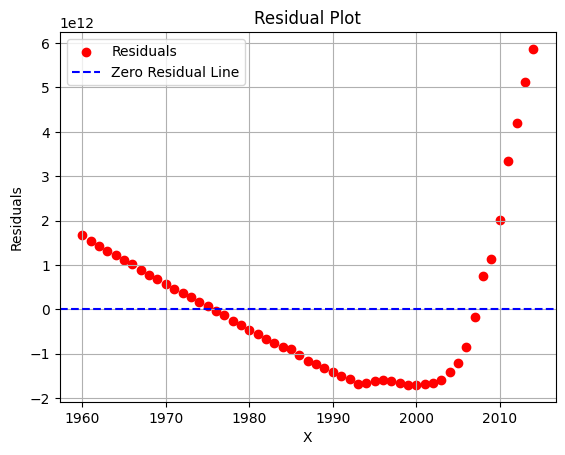

In [6]:
residual = y - y_pred

# Residual plot
plt.scatter(x, residual, c='red', label='Residuals')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Residual Line')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot')
plt.grid(True)
plt.show()

In [7]:
r2 = r2_score(y, y_pred)
print(f"The coefficient of determination or r squared is {r2}")

The coefficient of determination or r squared is 0.5239708235574752


In [8]:
# Get slope and intercept
y_log = np.log(y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y_log)

# Predict using the modified equation that is suitable for nonlinear data
y_pred = np.exp(intercept) * np.exp(slope * x)

# Compute r2 again
r2 = r2_score(y, y_pred)
print(f"The coefficient of determination or r squared is {r2}")

The coefficient of determination or r squared is 0.7663622396055385


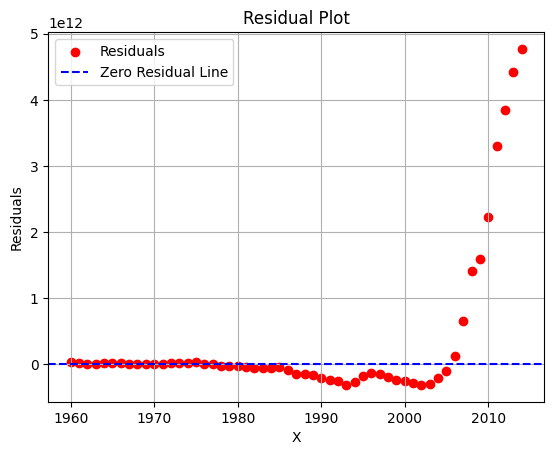

In [9]:
# Get residuals (actual - predicted)
residuals = y - y_pred

# Residual plot
plt.scatter(x, residuals, c='red', label='Residuals')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Residual Line')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# B. Categorical Encoding

In [10]:
data2 = pd.read_csv('2_melb_data.csv',encoding='latin1', index_col=0)
data2

,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Suburb,,,,,,,,,,,,,,,,,,,,
Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0


In [11]:
# Drop columns that will not be used (dates, zip codes)
columns_to_drop = ['Date','Address', 'SellerG', 'CouncilArea']
data2 = data2.drop(columns_to_drop, axis=1)

# Drop rows with missing values
data2.dropna(inplace=True)
data2

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
Suburb,,,,,,,,,,,,,,,,
Abbotsford,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,Northern Metropolitan,4019.0
Abbotsford,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,Northern Metropolitan,4019.0
Abbotsford,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,Northern Metropolitan,4019.0
Abbotsford,3,h,1876000.0,S,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,Northern Metropolitan,4019.0
Abbotsford,2,h,1636000.0,S,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Watsonia,2,h,650000.0,PI,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,Northern Metropolitan,2329.0
Werribee,4,h,635000.0,S,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,Western Metropolitan,16166.0
Williamstown,3,h,1031000.0,SP,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,Western Metropolitan,6380.0


In [12]:
pdata = data2.iloc[:, 0:-1].values

le = LabelEncoder()
pdata[:, 1] = le.fit_transform(pdata[:, 1]) #Type
pdata[:, 3] = le.fit_transform(pdata[:, 3]) #Method
pdata[:, 14] = le.fit_transform(pdata[:, 14]) #Regionname
pdata


array([[2, 0, 1035000.0, ..., -37.8079, 144.9934, 2],
       [3, 0, 1465000.0, ..., -37.8093, 144.9944, 2],
       [4, 0, 1600000.0, ..., -37.8072, 144.9941, 2],
       ...,
       [3, 0, 1031000.0, ..., -37.85927, 144.87904, 6],
       [4, 0, 2500000.0, ..., -37.85908, 144.89299, 6],
       [4, 0, 1285000.0, ..., -37.81188, 144.88449, 6]], dtype=object)

# C. Discretization

In [13]:
data3 = pd.read_csv('3_train.csv',encoding='latin1', index_col=0)
data3

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [14]:
pdata = data3.iloc[:,0:-1].index.values
num_bins = 3
df = pd.DataFrame({'PassengerId':pdata})
df['PassengerId'] = df['PassengerId'].str.strip('_').astype(int)
df['Bin'] = pd.cut(df['PassengerId'], bins=num_bins, labels=False)
df

,PassengerId,Bin
0,101,0
1,201,0
2,301,0
3,302,0
4,401,0
...,...,...
8688,927601,2
8689,927801,2
8690,927901,2
8691,928001,2


In [15]:
equal_width_discretizer = EqualWidthDiscretiser(bins=num_bins, variables=['PassengerId'])
df = equal_width_discretizer.fit_transform(df)

df

,PassengerId,Bin
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
8688,2,2
8689,2,2
8690,2,2
8691,2,2
